# <b> RETO: MERCADOTECNIA TELEFONICA </b>

## Adrián Vazquez

## Reto de Mercadotecnia Telefónica con Aprendizaje Supervisado

## 🎯 Objetivo del reto

El objetivo de este reto es **predecir si un cliente contratará un depósito a plazo** en base a los datos recolectados por campañas de marketing telefónico realizadas por una institución bancaria en Portugal.

Utilizaremos técnicas de **aprendizaje supervisado** para entrenar modelos de clasificación binaria que permitan anticipar la decisión del cliente y así optimizar las campañas futuras.

## 📦 Dataset

Trabajaremos con el dataset, el cual contiene **9,000 registros** y **16 variables predictoras**, además de la variable objetivo `y`.

---

✅ Aplicaremos dos modelos:
- Regresión Logística
- Red Neuronal

📊 Evaluaremos su rendimiento mediante:
- Matrices de confusión
- Métricas de clasificación

🧪 Partiremos los datos en:
- 60% entrenamiento
- 20% validación
- 20% prueba


# <b> Cargar librerias </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report


## 📋 Diccionario de variables: Bank Marketing Dataset

### 🧍 Cliente bancario
- **age**: Edad del cliente (numérica).
- **job**: Tipo de empleo del cliente (categórica: "admin.", "technician", "services", "management", etc.).
- **marital**: Estado civil (categórica: "married", "divorced", "single").
- **education**: Nivel educativo (categórica: "primary", "secondary", "tertiary", "unknown").
- **default**: ¿Tiene créditos en incumplimiento? (binaria: "yes", "no").

### 💳 Información financiera
- **balance**: Saldo promedio anual en euros (numérica).
- **housing**: ¿Tiene un crédito hipotecario? (binaria: "yes", "no").
- **loan**: ¿Tiene un crédito personal? (binaria: "yes", "no").

### 📞 Último contacto de campaña actual
- **contact**: Tipo de contacto (categórica: "unknown", "telephone", "cellular").
- **day**: Día del mes del último contacto (numérica).
- **month**: Mes del último contacto (categórica: "jan", "feb", ..., "dec").
- **duration**: Duración del último contacto en segundos (numérica).

### 📊 Historial de campañas
- **campaign**: Número de contactos realizados durante esta campaña (numérica).
- **pdays**: Días desde el último contacto en una campaña anterior (-1 significa que no fue contactado antes).
- **previous**: Número de contactos anteriores a esta campaña (numérica).
- **poutcome**: Resultado de la campaña anterior (categórica: "success", "failure", "other", "unknown").

### 🎯 Variable objetivo
- **y**: ¿El cliente contrató un depósito a plazo? (binaria: "yes", "no")


In [3]:
# Cargar el archivo CSV
data = pd.read_csv('0.xozu243mego0.145c4n51y90bbank_marketing_RETO_DS_AS.csv')

# Mostrar las primeras filas
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


## <b> Exploración Inicial </b>

In [4]:
# Ver estructura general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [5]:
# Contar valores faltantes por columna
data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# Estadísticas de variables numéricas
data.describe()


,age,balance,day,duration,campaign,pdays,previous
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,1482.262778,15.619556,353.832778,2.520111,50.511333,0.788889
std,11.664253,3031.013197,8.345305,336.945158,2.737758,107.691963,2.210273
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,109.000000,8.000000,131.000000,1.000000,-1.000000,0.000000
50%,39.000000,519.000000,15.000000,240.500000,2.000000,-1.000000,0.000000
75%,49.000000,1646.500000,21.000000,462.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3253.000000,58.000000,850.000000,58.000000


In [7]:
# Mostrar valores únicos por variable categórica
categorical_vars = data.select_dtypes(include='object').columns
for col in categorical_vars:
    print(f"{col}: {data[col].unique()}")


job: ['self-employed' 'unemployed' 'blue-collar' 'admin.' 'retired' 'services'
 'technician' 'management' 'entrepreneur' 'student' 'housemaid' 'unknown']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'unknown' 'secondary' 'primary']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['nov' 'sep' 'jul' 'aug' 'may' 'jun' 'jan' 'mar' 'oct' 'apr' 'feb' 'dec']
poutcome: ['success' 'unknown' 'failure' 'other']
y: ['yes' 'no']


## 📊 EDA – Análisis Exploratorio de Datos

En esta sección se realiza un análisis visual y estadístico para entender mejor la estructura de los datos y detectar patrones relevantes para el modelado:

-  **Distribuciones**: Se grafican histogramas de variables numéricas para detectar asimetrías, escalas diferentes o presencia de valores extremos (outliers).

-  **Correlaciones**: Se construye una matriz de correlación para identificar relaciones lineales entre variables numéricas y posibles redundancias.

-  **Boxplots por clase objetivo (`y`)**: Se analizan variables numéricas en función de si el cliente contrató o no el depósito a plazo, con el fin de detectar variables discriminantes.

-  **Balance de clases**: Se visualiza la proporción de la variable objetivo para saber si el dataset está balanceado o presenta desbalance de clases.

-  **Relación entre variables categóricas y la variable objetivo**: Se analizan frecuencias cruzadas de variables como `job`, `education`, `housing`, etc., respecto a `y`, para identificar categorías con mayor o menor probabilidad de conversión.

Este análisis permitirá tomar decisiones informadas para el preprocesamiento y la selección de variables en los modelos de clasificación.


### <b> Distribuciones de variables numéricas  </b>

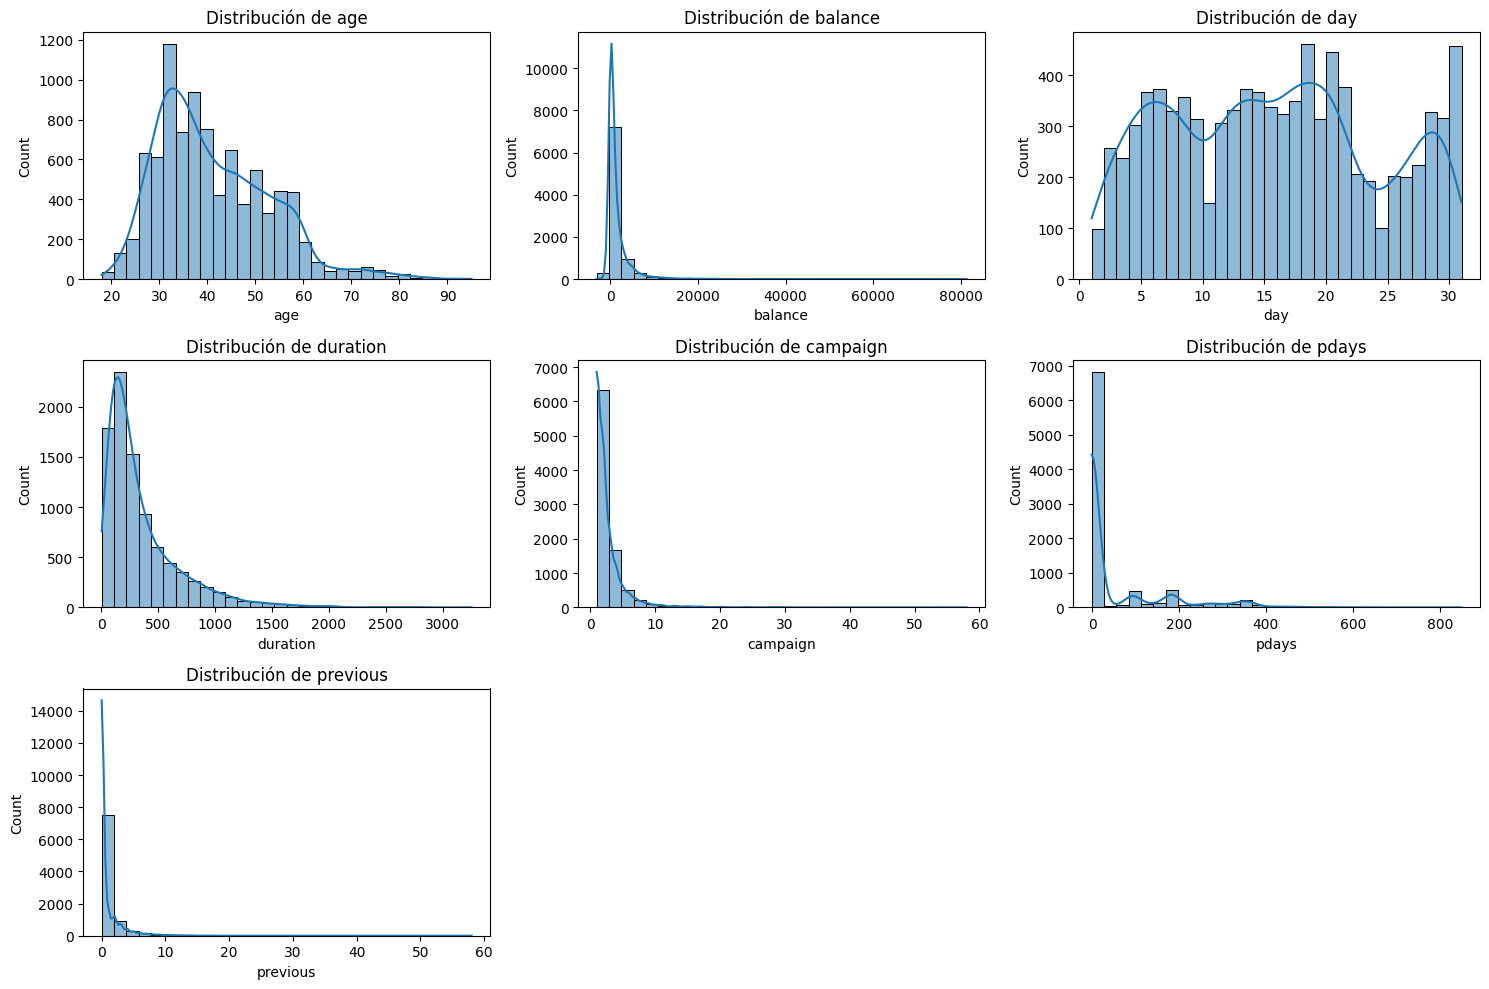

In [12]:
num_cols = data.select_dtypes(include='number').columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f"Distribución de {col}")

# Ocultar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("distribuciones_numericas.png", dpi=300)
plt.show()



### <b> Matriz de correlación </b>

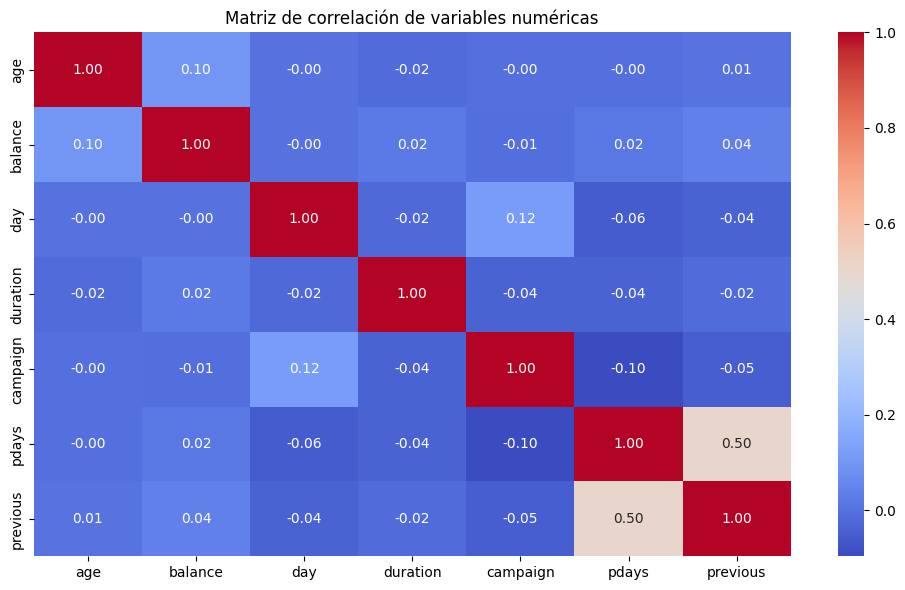

In [13]:
corr = data[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.savefig("matriz_correlacion.png", dpi=300)
plt.show()


### <b> Boxplots para variable numérica vs target  </b>

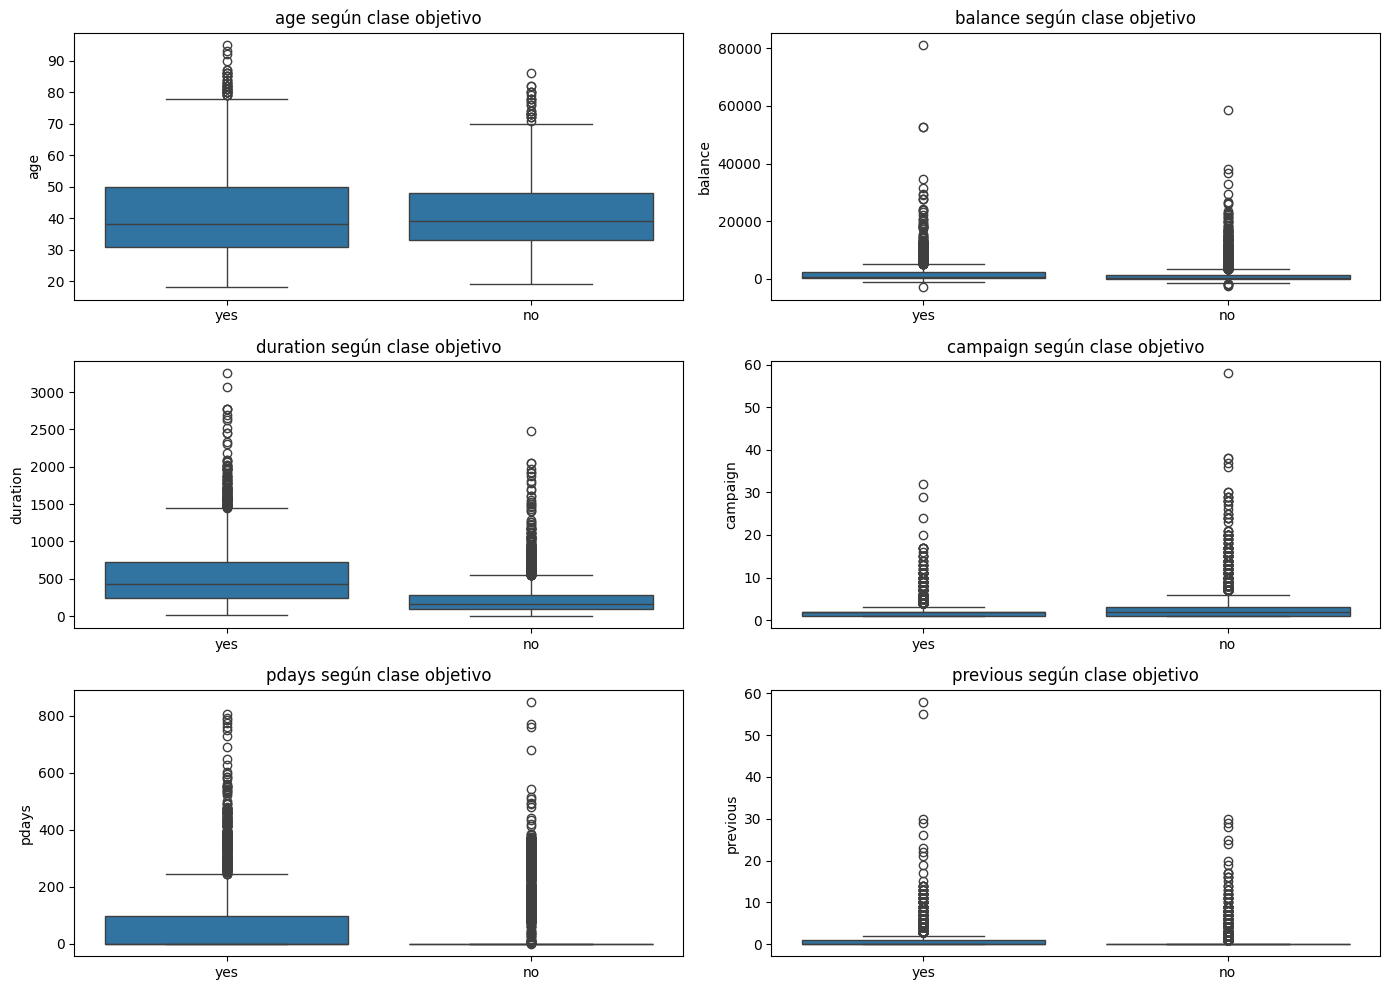

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()
numeric_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for i, col in enumerate(numeric_vars):
    sns.boxplot(x='y', y=col, data=data, ax=axes[i])
    axes[i].set_title(f'{col} según clase objetivo')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.savefig("boxplots_numericos_vs_y.png", dpi=300)
plt.show()


### <b> Proporción de clases </b>

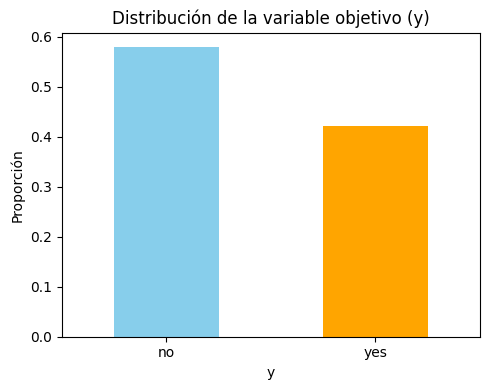

In [15]:
plt.figure(figsize=(5, 4))
data['y'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribución de la variable objetivo (y)")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("proporcion_clases_y.png", dpi=300)
plt.show()



### <b> Cruces entre variables categoricas y `y`  </b>

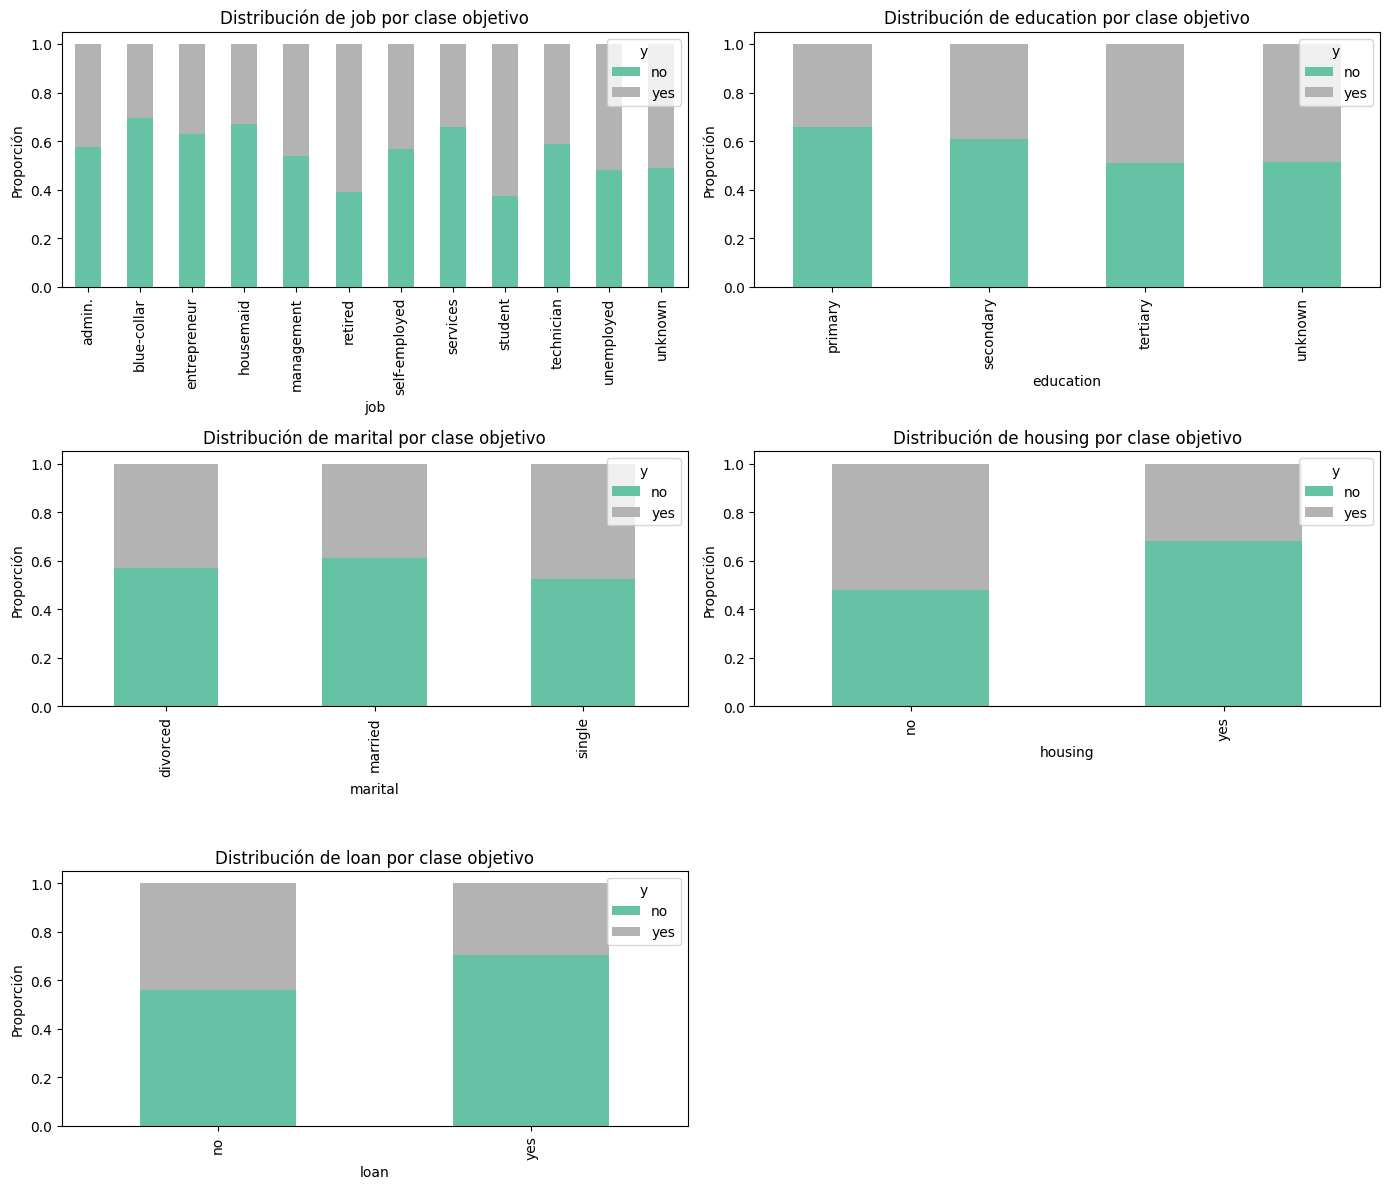

In [16]:
categorical_cols = ['job', 'education', 'marital', 'housing', 'loan']
n_cols = 2
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(data[col], data['y'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=axes[i], colormap="Set2")
    axes[i].set_title(f"Distribución de {col} por clase objetivo")
    axes[i].set_ylabel("Proporción")
    axes[i].legend(title='y', loc='upper right')

# Eliminar ejes vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("cruces_categoricas_y.png", dpi=300)
plt.show()


### <b> Conclusiones del Análisis Exploratorio de Datos (EDA) </b>
 1. <b> Distribuciones de variables numéricas </b>

   - Variables como balance, duration, campaign, pdays y previous están fuertemente sesgadas a la derecha, con muchos valores concentrados en rangos bajos y pocos valores extremos muy altos (outliers).

   - La variable age tiene una distribución ligeramente asimétrica hacia la derecha, pero mucho más regular que las otras.

   - Considerar aplicar transformaciones (como logaritmo o raíz cuadrada) a balance, duration, pdays, previous y campaign.

 2. <b> Matriz de correlación </b>

   - No existen correlaciones fuertes entre variables numéricas (la mayoría < 0.1).

   - La única correlación moderada es entre pdays y previous (~0.50), lo cual tiene sentido: a más días desde la última campaña, es probable que haya habido más contactos.

   -  No hay evidencia de multicolinealidad severa, por lo tanto no es necesario eliminar variables por redundancia.

 3. <b> Boxplots de variables numéricas por clase objetivo </b> 

   - Los clientes que sí contrataron (y = yes) tienden a tener:

     - Contactos más largos (duration más alta).

     - Menos campañas (campaign) en promedio.

     - Valores más altos en pdays y previous, lo que puede indicar que los seguimientos anteriores influyen positivamente.

     -  Estas variables pueden ser especialmente útiles para los modelos predictivos.

 4. <b> Proporción de clases </b> 

   - Las clases están relativamente balanceadas:

     - Aprox. 57% de clientes dijeron NO, 43% dijeron SÍ al depósito.

     -  Aunque no está fuertemente desbalanceado, se puede evaluar usar class_weight='balanced' en modelos como regresión logística o redes neuronales para reforzar la clase minoritaria.

 5. <b> Variables categóricas vs clase objetivo </b>

   - Algunos grupos de interés que tienden a aceptar más el producto (y = yes):

     - Profesiones como student, retired y unemployed

     - Personas con educación terciaria

     - Clientes sin hipoteca y sin préstamo personal

     - Solteros y divorciados parecen tener tasas de conversión levemente mayores que casados

     -  Estas variables tienen potencial predictivo y deben conservarse en el modelo tras codificación.

## ✅ Conclusiones Generales del EDA

### 1.  Naturaleza del problema
La variable objetivo `y` es binaria (`yes` / `no`), por lo tanto estamos ante un **problema de clasificación binaria**.

🔹 **Modelos apropiados**: Regresión Logística, Árboles de Decisión, Redes Neuronales, etc.

---

### 2.  Balance de clases
Las clases están **moderadamente balanceadas** (`no ≈ 57%`, `yes ≈ 43%`), por lo que **no se requiere un tratamiento complejo de desbalance** como SMOTE o undersampling.

🔹 **Modelos estándar pueden funcionar bien**, pero podríamos considerar `class_weight='balanced'` para mejorar la sensibilidad.

---

### 3.  Presencia de variables categóricas
El dataset contiene **múltiples variables categóricas importantes** (`job`, `education`, `marital`, `contact`, etc.).

🔹 **Modelos que manejan bien codificaciones categóricas**:
- Regresión Logística → requiere One-Hot Encoding
- Red Neuronal MLP → requiere variables numéricas y escaladas

---

### 4.  Relaciones no lineales y efectos combinados
Algunas variables como `duration` y `pdays` muestran **patrones complejos entre clases**.

🔹 Esto sugiere que **modelos más expresivos** como redes neuronales o árboles podrían capturar interacciones **no lineales** que una regresión logística simple no puede.

---

### 5.  Variables numéricas con outliers y sesgo
Variables como `balance`, `pdays`, `duration` tienen **distribuciones sesgadas y valores atípicos importantes**.

🔹 Los modelos lineales como la regresión logística pueden ser **sensibles al escalado y a los outliers**, por lo que es recomendable escalar bien y/o transformar algunas variables.

---

##  Elección de modelos

| Modelo                | Justificación                                                                 |
|-----------------------|------------------------------------------------------------------------------|
| **Regresión Logística** | ✔ Modelo interpretable<br>✔ Baseline sólido<br>✔ Funciona bien con datos tabulares |
| **Red Neuronal (MLP)** | ✔ Captura relaciones no lineales<br>✔ Puede mejorar métricas con suficiente preprocesamiento |



## <b> Preprocesamiento </b>

 1. Codificación de variables categóricas (One-Hot Encoding)

 2. Escalado de variables numéricas

 3. Separación de variables predictoras (X) y target (y)

 4. División del dataset en entrenamiento, validación y prueba (60/20/20)

### <b> Codificación y escalado </b>


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar variable objetivo y predictoras
X = data.drop("y", axis=1)
y = data["y"].map({"yes": 1, "no": 0})  # Convertir target a binario

# Variables categóricas y numéricas
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include="number").columns.tolist()

# Preprocesamiento: codificación + escalado
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)
])

# Aplicamos el preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Guardamos nombres de columnas codificadas
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
X_processed_df = pd.DataFrame(X_processed, columns=num_cols + list(ohe_columns))


### <b> Dividir datos: Entrenamiernto, Validación y Prueba </b>

In [18]:
# División 60% entrenamiento, 20% validación, 20% prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Verificación
print("Tamaños:")
print(f"Entrenamiento: {X_train.shape}")
print(f"Validación: {X_val.shape}")
print(f"Prueba: {X_test.shape}")


Tamaños:
Entrenamiento: (5400, 42)
Validación: (1800, 42)
Prueba: (1800, 42)


## <b> Modelos </b> 
 1. Entrenamiento de regresión logistica 
 2. Red Neuronal MLP

### <b>Regresión logistica  </b>

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1042
           1       0.79      0.81      0.80       758

    accuracy                           0.83      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.83      0.83      1800



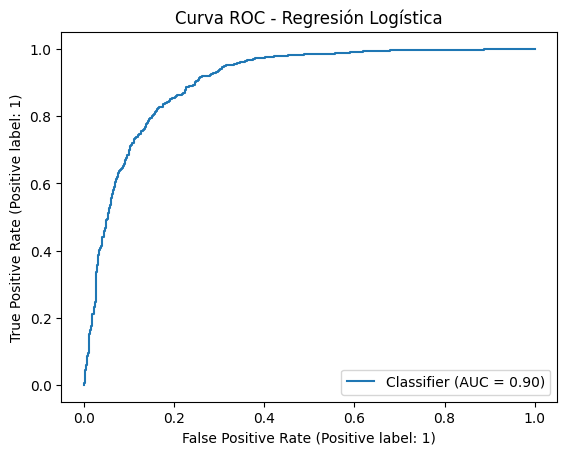

AUC: 0.9039


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, roc_auc_score

# Modelo con balanceo de clases (opcional)
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)

# Evaluación en validación
y_pred = log_model.predict(X_val)
y_proba = log_model.predict_proba(X_val)[:, 1]

# Métricas
print("Reporte de Clasificación:\n")
print(classification_report(y_val, y_pred))

# Curva ROC
RocCurveDisplay.from_predictions(y_val, y_proba)
plt.title("Curva ROC - Regresión Logística")
plt.show()

# AUC
auc_score = roc_auc_score(y_val, y_proba)
print(f"AUC: {auc_score:.4f}")


### <b> Ren Neuronal MLPClassifier </b>

c:\Users\avazq\anaconda3\envs\mpyst\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Reporte de Clasificación - Red Neuronal:

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1042
           1       0.75      0.82      0.79       758

    accuracy                           0.81      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.82      0.81      0.81      1800



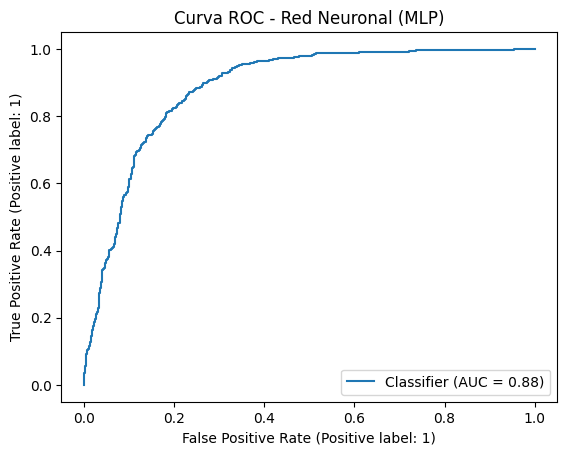

AUC MLP: 0.8846


In [20]:
from sklearn.neural_network import MLPClassifier

# Red neuronal simple: 2 capas ocultas con 32 y 16 neuronas
mlp_model = MLPClassifier(hidden_layer_sizes=(32, 16), 
                          activation='relu', 
                          solver='adam', 
                          max_iter=300, 
                          random_state=42)

mlp_model.fit(X_train, y_train)

# Predicción
y_pred_mlp = mlp_model.predict(X_val)
y_proba_mlp = mlp_model.predict_proba(X_val)[:, 1]

# Métricas
print("Reporte de Clasificación - Red Neuronal:\n")
print(classification_report(y_val, y_pred_mlp))

# Curva ROC
RocCurveDisplay.from_predictions(y_val, y_proba_mlp)
plt.title("Curva ROC - Red Neuronal (MLP)")
plt.show()

# AUC
auc_mlp = roc_auc_score(y_val, y_proba_mlp)
print(f"AUC MLP: {auc_mlp:.4f}")


##  Comparación de Modelos en Validación

| Métrica          | Regresión Logística | Red Neuronal (MLP) |
|------------------|---------------------|---------------------|
| **Accuracy**     | 0.83                | 0.81                |
| **Precision (1)**| 0.79                | 0.75                |
| **Recall (1)**   | 0.81                | 0.82                |
| **F1-score (1)** | 0.80                | 0.79                |
| **AUC**          | **0.90**            | 0.88                |

---

##  Conclusiones

### 🔍 1. **Regresión Logística supera ligeramente al MLP**
- **Mejor AUC (0.90)** y mejor **precision y f1-score** para la clase positiva (`yes`).
- Es un modelo más simple, rápido y fácil de interpretar.

### 📉 2. **MLP es competitivo pero no lo supera**
- Tiene una ligera ventaja en **recall** (82% vs 81%), lo que significa que detecta un poco más de positivos.
- Pero sacrifica algo de precisión, y en conjunto su AUC es inferior.

### ⚙️ 3. Ambos modelos están bien calibrados
- Las curvas ROC muestran un buen comportamiento, alejadas de la línea aleatoria.

---

> Dado que el objetivo es predecir si un cliente aceptará el depósito, y se busca **precisión + generalización**, **la regresión logística es la mejor elección en este caso**.


## <b> Evaluación en el conjunto de prueba </b>

### <b> Regresión logistica </b>

 Regresión Logística - Test Set

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1043
           1       0.78      0.81      0.80       757

    accuracy                           0.83      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.83      0.83      1800



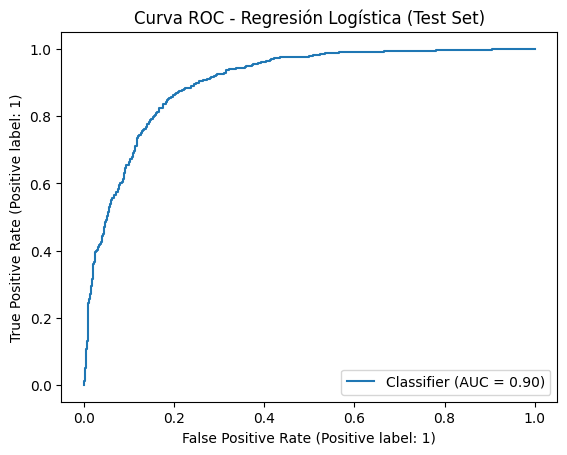

AUC (Logística - Test): 0.9020


In [23]:
# Predicción sobre el test set
y_test_pred_log = log_model.predict(X_test)
y_test_proba_log = log_model.predict_proba(X_test)[:, 1]

# Reporte
print(" Regresión Logística - Test Set\n")
print(classification_report(y_test, y_test_pred_log))

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_test_proba_log)
plt.title("Curva ROC - Regresión Logística (Test Set)")
plt.show()

# AUC
auc_test_log = roc_auc_score(y_test, y_test_proba_log)
print(f"AUC (Logística - Test): {auc_test_log:.4f}")


### <b> Red Neuronal (MLP)  </b>

🔹 Red Neuronal MLP - Test Set

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1043
           1       0.77      0.82      0.79       757

    accuracy                           0.82      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.82      0.82      0.82      1800



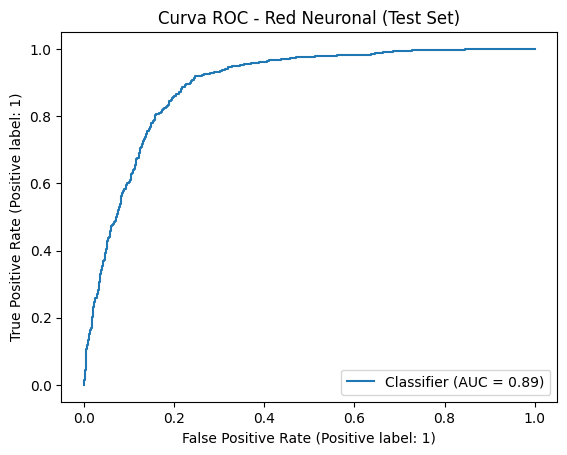

AUC (MLP - Test): 0.8920


In [ ]:
# Predicción sobre el test set
y_test_pred_mlp = mlp_model.predict(X_test)
y_test_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Reporte
print(" Red Neuronal MLP - Test Set\n")
print(classification_report(y_test, y_test_pred_mlp))

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_test_proba_mlp)
plt.title("Curva ROC - Red Neuronal (Test Set)")
plt.show()

# AUC
auc_test_mlp = roc_auc_score(y_test, y_test_proba_mlp)
print(f"AUC (MLP - Test): {auc_test_mlp:.4f}")


##  Evaluación Final en Conjunto de Prueba

| Métrica          | Regresión Logística | Red Neuronal (MLP) |
|------------------|---------------------|---------------------|
| **Accuracy**     | 0.83                | 0.82                |
| **Precision (1)**| 0.78                | 0.77                |
| **Recall (1)**   | 0.81                | 0.82                |
| **F1-score (1)** | 0.80                | 0.79                |
| **AUC**          | **0.90**            | 0.89                |

---

###  Conclusiones Finales

1. **Ambos modelos generalizan bien** al conjunto de prueba, sin indicios de sobreajuste.
2. La **regresión logística** sigue siendo el modelo con mejor desempeño general:
   - Tiene **mayor precisión y f1-score**, lo que sugiere un menor número de falsos positivos.
   - Su AUC (0.90) indica **mejor capacidad discriminativa**.
3. La **Red Neuronal (MLP)** es ligeramente mejor en **recall**, lo que indica que detecta más verdaderos positivos.
   - Puede ser útil si la prioridad del negocio es **maximizar captación de clientes** aún a costa de más falsos positivos.

---

> **Regresión Logística** es el modelo más balanceado, robusto e interpretable para este reto. Sin embargo, el uso conjunto con el MLP como modelo de comparación aporta valor al análisis y justificación de elección.


### <b> Justifica el uso de LabelEncoder o OneHotEncoder </b>

Se utilizó **OneHotEncoder** para transformar las variables categóricas debido a que estas no tienen un orden intrínseco (por ejemplo, `job`, `marital`, `education`, `contact`). OneHotEncoder permite representar cada categoría como una columna binaria, lo que evita introducir relaciones numéricas artificiales entre las categorías, algo que podría ocurrir si se usara LabelEncoder. Esto es especialmente importante en modelos lineales como la Regresión Logística, que pueden verse influenciados por escalas numéricas mal interpretadas.

Para algunas variables binarias (`yes` / `no`), como `default`, `housing` y `loan`, se utilizó **LabelEncoder** por su simplicidad, ya que estas variables ya representan un valor booleano natural.

---
### **Conclusiones del problema: uso de técnicas de inteligencia artificial en problemas de mercadotecnia**

Las técnicas de inteligencia artificial, como la **Regresión Logística** y las **Redes Neuronales**, permiten analizar grandes volúmenes de datos de clientes y campañas de manera eficiente para **predecir comportamientos**, como la probabilidad de que un cliente contrate un producto financiero.

En este caso, observamos que ambos modelos alcanzaron métricas de desempeño sobresalientes (AUC ≈ 0.90), lo cual indica que pueden identificar patrones útiles en los datos históricos para apoyar la **toma de decisiones en marketing**, optimizando recursos y enfocando los esfuerzos en los clientes con mayor probabilidad de conversión.

En resumen, la IA representa una herramienta poderosa para mejorar el **retorno de inversión (ROI)** en campañas de mercadotecnia y personalizar estrategias de contacto con base en el comportamiento histórico de los usuarios.

---
